In [2]:
import numpy as np
import pandas as pd
df = np.load('Right_DLF_p_1.npy')

In [3]:
df

array([[[ 0.37576157,  0.40020782,  0.44731727],
        [ 0.50081736,  0.54565555,  0.42497924],
        [ 0.50669008,  0.55236995,  0.58342642],
        ...,
        [-0.09295887, -0.07143288, -0.09663436],
        [-0.09521735, -0.09023987, -0.07806884],
        [-0.09634058, -0.09706819, -0.0948789 ]],

       [[ 0.35497621,  0.37299716,  0.41676369],
        [ 0.4689191 ,  0.51461262,  0.41125065],
        [ 0.49862522,  0.54729617,  0.57907647],
        ...,
        [-0.08324033, -0.06806747, -0.08664183],
        [-0.08152283, -0.07479328, -0.07675469],
        [-0.08692317, -0.08233369, -0.0769953 ]],

       [[ 0.36129355,  0.39484596,  0.44074115],
        [ 0.49032116,  0.536798  ,  0.42446351],
        [ 0.51232737,  0.56810123,  0.60684645],
        ...,
        [-0.09465973, -0.06977872, -0.09674535],
        [-0.0901408 , -0.08002035, -0.08379287],
        [-0.09811593, -0.08989062, -0.08073324]],

       ...,

       [[ 0.37539715,  0.42554384,  0.48378012],
        [ 0

In [4]:
len(df[:300])

300

In [5]:
df_D = pd.DataFrame(df[:300,3,:])
df_D = df_D.assign(category = "first")
df_D = df_D.set_index(['category'])
df_D.columns= ['x','y','z']

In [6]:
df_E = pd.DataFrame(df[:300,7,:])
df_E = df_E.assign(category = "second")
df_E = df_E.set_index(['category'])
df_E.columns= ['x','y','z']

In [7]:
df_F = pd.DataFrame(df[:300,11,:])
df_F = df_F.assign(category = "third")
df_F = df_F.set_index(['category'])
df_F.columns= ['x','y','z']

In [8]:
a =[]
for i in range(10):
     a.append(df_D[30*i:30*(i+1)].mean())

In [9]:
b =[]
for i in range(10):
     b.append(df_E[30*i:30*(i+1)].mean())

In [10]:
c =[]
for i in range(10):
     c.append(df_F[30*i:30*(i+1)].mean())

In [11]:
c

[x    0.906104
 y    0.842685
 z    0.855707
 dtype: float64,
 x    0.888399
 y    0.800080
 z    0.850948
 dtype: float64,
 x    0.885321
 y    0.798020
 z    0.843946
 dtype: float64,
 x    0.909073
 y    0.818935
 z    0.877157
 dtype: float64,
 x    0.918071
 y    0.816866
 z    0.894739
 dtype: float64,
 x    0.921435
 y    0.814680
 z    0.897590
 dtype: float64,
 x    0.905944
 y    0.797054
 z    0.881053
 dtype: float64,
 x    0.897201
 y    0.789753
 z    0.872480
 dtype: float64,
 x    0.894977
 y    0.782707
 z    0.868109
 dtype: float64,
 x    0.884144
 y    0.783801
 z    0.865252
 dtype: float64]

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline 
from mpl_toolkits.mplot3d import Axes3D

In [13]:
da1 = pd.DataFrame([[a[0][0],a[0][1],a[0][2]]], columns=['x','y','z'])
da2 = pd.DataFrame([[b[0][0],b[0][1],b[0][2]]], columns=['x','y','z'])
da3 = pd.DataFrame([[c[0][0],c[0][1],c[0][2]]], columns=['x','y','z'])

In [14]:
da1

,x,y,z
0,0.475553,0.568254,0.592434


In [15]:
da2

,x,y,z
0,0.958373,0.911522,0.867216


In [16]:
da = pd.concat([da1,da2,da3])

In [17]:
da

,x,y,z
0,0.475553,0.568254,0.592434
0,0.958373,0.911522,0.867216
0,0.906104,0.842685,0.855707


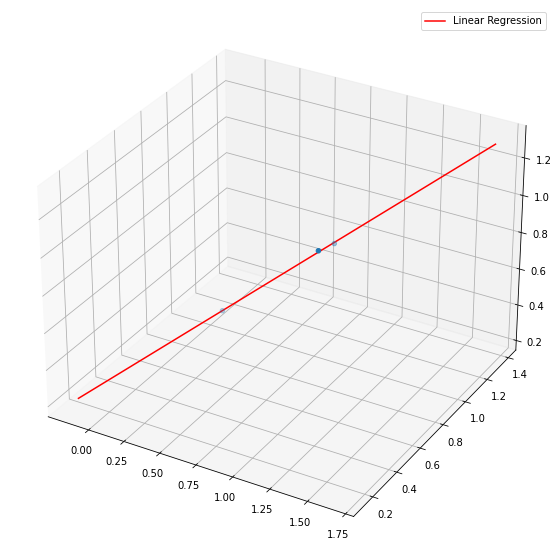

In [18]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
X = da[['x', 'y', 'z']].values
Xlen = X.shape[0]
avgPointCloud = 1 / Xlen * np.array([np.sum(X[:, 0]), np.sum(X[:, 1]), np.sum(X[:, 2])])
Xmean = X - avgPointCloud

cov = 1 / Xlen * X.T.dot(Xmean)

t = np.arange(-20, 20, 1)
linearReg = avgPointCloud + cov[:, 0] * np.vstack(t)

ax.scatter(da['x'],da['y'],da['z'])
ax.plot(linearReg[:, 0], linearReg[:, 1], linearReg[:, 2], 'r', label='Linear Regression')
ax.legend()

plt.show()

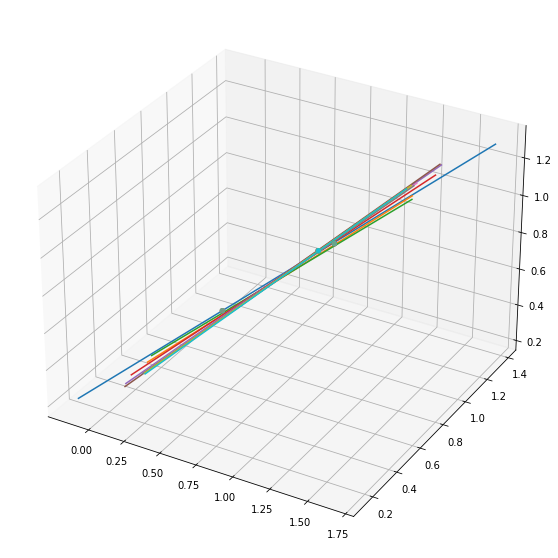

In [19]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
for i in range(10):
    da1 = pd.DataFrame([[a[i][0],a[i][1],a[i][2]]], columns=['x','y','z'])
    da2 = pd.DataFrame([[b[i][0],b[i][1],b[i][2]]], columns=['x','y','z'])
    da3 = pd.DataFrame([[c[i][0],c[i][1],c[i][2]]], columns=['x','y','z'])
    data = pd.concat([da1,da2,da3])
    
    X = data[['x', 'y', 'z']].values
    Xlen = X.shape[0]
    avgPointCloud = 1 / Xlen * np.array([np.sum(X[:, 0]), np.sum(X[:, 1]), np.sum(X[:, 2])])
    Xmean = X - avgPointCloud

    cov = 1 / Xlen * X.T.dot(Xmean)

    t = np.arange(-20, 20, 1)
    linearReg = avgPointCloud + cov[:, 0] * np.vstack(t)

    ax.scatter(da['x'],da['y'],da['z'])
    ax.plot(linearReg[:, 0], linearReg[:, 1], linearReg[:, 2], label='Linear Regression')
plt.show()

In [27]:
data = pd.DataFrame()
for i in range(10):
    da1 = pd.DataFrame([[a[i][0],a[i][1],a[i][2]]], columns=['x','y','z'])
    da2 = pd.DataFrame([[b[i][0],b[i][1],b[i][2]]], columns=['x','y','z'])
    da3 = pd.DataFrame([[c[i][0],c[i][1],c[i][2]]], columns=['x','y','z'])
    data = pd.concat([data, da1, da2, da3])

In [28]:
len(data)

30

In [29]:
index = [0,0,0,1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8,9,9,9]
index = np.array(index)
data['index'] = index
data = data.set_index(['index'])

In [30]:
data

,x,y,z
index,,,
0,0.475553,0.568254,0.592434
0,0.958373,0.911522,0.867216
0,0.906104,0.842685,0.855707
1,0.501193,0.585621,0.586180
1,0.864168,0.811688,0.784674
1,0.888399,0.800080,0.850948
2,0.509556,0.595585,0.599065
2,0.879563,0.826292,0.794395
2,0.885321,0.798020,0.843946


<AxesSubplot:>

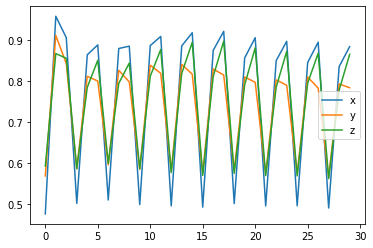

In [31]:
data.reset_index(drop='True').plot.line()

In [46]:
linearReg

array([[0.12062381, 0.34907884, 0.29362631],
       [0.15142045, 0.36732769, 0.3156996 ],
       [0.18221709, 0.38557655, 0.33777289],
       [0.21301373, 0.4038254 , 0.35984618],
       [0.24381037, 0.42207426, 0.38191947],
       [0.27460701, 0.44032311, 0.40399276],
       [0.30540365, 0.45857197, 0.42606605],
       [0.33620029, 0.47682082, 0.44813934],
       [0.36699693, 0.49506968, 0.47021263],
       [0.39779357, 0.51331853, 0.49228592],
       [0.42859021, 0.53156739, 0.51435921],
       [0.45938685, 0.54981624, 0.5364325 ],
       [0.49018349, 0.5680651 , 0.55850579],
       [0.52098014, 0.58631395, 0.58057908],
       [0.55177678, 0.60456281, 0.60265237],
       [0.58257342, 0.62281166, 0.62472566],
       [0.61337006, 0.64106052, 0.64679895],
       [0.6441667 , 0.65930937, 0.66887224],
       [0.67496334, 0.67755823, 0.69094553],
       [0.70575998, 0.69580709, 0.71301882],
       [0.73655662, 0.71405594, 0.73509211],
       [0.76735326, 0.7323048 , 0.7571654 ],
       [0.

In [41]:
import cv2
import mediapipe as mp
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [59]:
image_files = ['image.jpg']
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.7) as hands:
  for idx, file in enumerate(image_files):
    #이미지를 읽어들이고, 보기 편하게 이미지 좌우 반전
    image = cv2.flip(cv2.imread(file),1)
    #작업 전에 BGR -> RGB 변환
    results = hands.process(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    
    # 손으로 프린트하고 이미지에 손 랜드마크를 그립니다.
    print('Handedness:', results.multi_handedness)
    if not results.multi_hand_landmarks:
      continue
    image_height, image_width, _ = image.shape
    annotated_image = image.copy()
    x=[]
    y=[]
    z=[]
    for hand_landmarks in results.multi_hand_landmarks:
        print('hand_landmarks:', hand_landmarks)
        for point in results.multi_hand_landmarks[0].landmark:
            x.append(point.x)
            y.append(point.y)
            z.append(point.z)
        mp_drawing.draw_landmarks(
            annotated_image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
        frame_array = np.vstack((x,y,z))

Handedness: [classification {
  index: 1
  score: 0.9827526807785034
  label: "Right"
}
]
hand_landmarks: landmark {
  x: 0.498061865568161
  y: 0.6956992149353027
  z: -6.131971304057515e-07
}
landmark {
  x: 0.45849788188934326
  y: 0.629779040813446
  z: -0.0005177483544684947
}
landmark {
  x: 0.4592429995536804
  y: 0.5641922354698181
  z: -0.0035556575749069452
}
landmark {
  x: 0.4615951478481293
  y: 0.5071344375610352
  z: -0.011713913641870022
}
landmark {
  x: 0.45572176575660706
  y: 0.45475488901138306
  z: -0.017907127737998962
}
landmark {
  x: 0.517915666103363
  y: 0.507763147354126
  z: 0.01924094930291176
}
landmark {
  x: 0.494835764169693
  y: 0.4447163939476013
  z: -0.004061814397573471
}
landmark {
  x: 0.4681294858455658
  y: 0.4726511240005493
  z: -0.01678704097867012
}
landmark {
  x: 0.46118640899658203
  y: 0.5087969303131104
  z: -0.021173322573304176
}
landmark {
  x: 0.53536057472229
  y: 0.5113298296928406
  z: 0.009819080121815205
}
landmark {
  x: 0.

In [60]:
fa = frame_array

In [73]:
fa

array([[ 4.98061866e-01,  4.58497882e-01,  4.59243000e-01,
         4.61595148e-01,  4.55721766e-01,  5.17915666e-01,
         4.94835764e-01,  4.68129486e-01,  4.61186409e-01,
         5.35360575e-01,  4.94033903e-01,  4.67673481e-01,
         4.73520756e-01,  5.49376369e-01,  4.97268885e-01,
         4.79402363e-01,  4.92746800e-01,  5.56195796e-01,
         5.06290138e-01,  4.92707491e-01,  5.05657196e-01],
       [ 6.95699215e-01,  6.29779041e-01,  5.64192235e-01,
         5.07134438e-01,  4.54754889e-01,  5.07763147e-01,
         4.44716394e-01,  4.72651124e-01,  5.08796930e-01,
         5.11329830e-01,  4.50629801e-01,  5.07558227e-01,
         5.41118622e-01,  5.21091521e-01,  4.80123699e-01,
         5.40742576e-01,  5.71166217e-01,  5.39214313e-01,
         5.16777098e-01,  5.55550158e-01,  5.75577319e-01],
       [-6.13197130e-07, -5.17748354e-04, -3.55565757e-03,
        -1.17139136e-02, -1.79071277e-02,  1.92409493e-02,
        -4.06181440e-03, -1.67870410e-02, -2.11733226e

In [61]:
ju1 = pd.DataFrame([[fa[0][3],fa[1][3],fa[2][3]]], columns=['x','y','z'])
ju2 = pd.DataFrame([[fa[0][7],fa[1][7],fa[2][7]]], columns=['x','y','z'])
ju3 = pd.DataFrame([[fa[0][11],fa[1][11],fa[2][11]]], columns=['x','y','z'])
ju = pd.concat([ju1,ju2,ju3])  

In [62]:
ju

,x,y,z
0,0.461595,0.507134,-0.011714
0,0.468129,0.472651,-0.016787
0,0.467673,0.507558,-0.020735


In [ ]:
import matplotlib.pyplot as plt

In [88]:
ju

,x,y,z
0,0.461595,0.507134,-0.011714
0,0.468129,0.472651,-0.016787
0,0.467673,0.507558,-0.020735


In [86]:
def plot(df):
    fig=plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ary = df[['x', 'y']].values
    arylen = ary.shape[0]
    avgPointCloud = 1 / arylen * np.array([np.sum(ary[:, 0]), np.sum(ary[:, 1])])
    arymean = ary - avgPointCloud
    
    cov = 1 / arylen * ary.T.dot(arymean)
    
    t = np.arange(-500, 500, 1)
    linearReg = avgPointCloud + cov[:, 0] * np.vstack(t)
    
    ax.scatter(df['x'], df['y'])
    ax.plot(linearReg[:, 0], linearReg[:, 1], 'r', label='Linear Regression')
    ax.legend()
    ax.view_init(90, 90)
    plt.show()

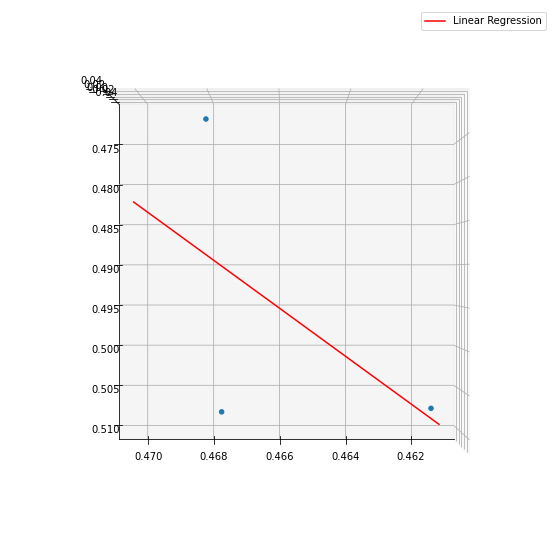

In [87]:
plot(ju)

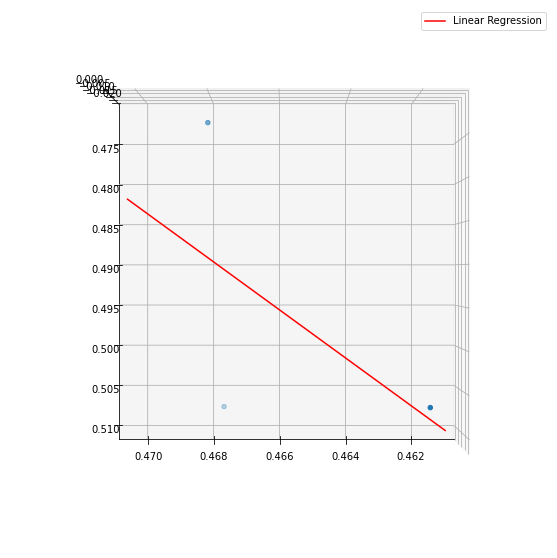

In [72]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
J = ju[['x', 'y']].values
Jlen = J.shape[0]
avgPointCloud = 1 / Jlen * np.array([np.sum(J[:, 0]), np.sum(J[:, 1])])
Jmean = J - avgPointCloud

cov = 1 / Jlen * J.T.dot(Jmean)

t = np.arange(-500, 500, 1)
linearReg = avgPointCloud + cov[:, 0] * np.vstack(t)

ax.scatter(ju['x'],ju['y'],ju['z'])
ax.plot(linearReg[:, 0], linearReg[:, 1], 'r', label='Linear Regression')
ax.legend()
ax.view_init(90, 90)
plt.show()

In [64]:
linearReg[:, 0]

array([0.46136317, 0.46137204, 0.46138091, 0.46138979, 0.46139866,
       0.46140753, 0.4614164 , 0.46142528, 0.46143415, 0.46144302,
       0.46145189, 0.46146077, 0.46146964, 0.46147851, 0.46148738,
       0.46149626, 0.46150513, 0.461514  , 0.46152287, 0.46153174,
       0.46154062, 0.46154949, 0.46155836, 0.46156723, 0.46157611,
       0.46158498, 0.46159385, 0.46160272, 0.4616116 , 0.46162047,
       0.46162934, 0.46163821, 0.46164709, 0.46165596, 0.46166483,
       0.4616737 , 0.46168258, 0.46169145, 0.46170032, 0.46170919,
       0.46171807, 0.46172694, 0.46173581, 0.46174468, 0.46175355,
       0.46176243, 0.4617713 , 0.46178017, 0.46178904, 0.46179792,
       0.46180679, 0.46181566, 0.46182453, 0.46183341, 0.46184228,
       0.46185115, 0.46186002, 0.4618689 , 0.46187777, 0.46188664,
       0.46189551, 0.46190439, 0.46191326, 0.46192213, 0.461931  ,
       0.46193988, 0.46194875, 0.46195762, 0.46196649, 0.46197536,
       0.46198424, 0.46199311, 0.46200198, 0.46201085, 0.46201

In [65]:
linearReg[:, 1]

array([0.50904057, 0.50901405, 0.50898753, 0.50896101, 0.50893449,
       0.50890798, 0.50888146, 0.50885494, 0.50882842, 0.5088019 ,
       0.50877538, 0.50874886, 0.50872235, 0.50869583, 0.50866931,
       0.50864279, 0.50861627, 0.50858975, 0.50856323, 0.50853672,
       0.5085102 , 0.50848368, 0.50845716, 0.50843064, 0.50840412,
       0.5083776 , 0.50835109, 0.50832457, 0.50829805, 0.50827153,
       0.50824501, 0.50821849, 0.50819197, 0.50816546, 0.50813894,
       0.50811242, 0.5080859 , 0.50805938, 0.50803286, 0.50800634,
       0.50797982, 0.50795331, 0.50792679, 0.50790027, 0.50787375,
       0.50784723, 0.50782071, 0.50779419, 0.50776768, 0.50774116,
       0.50771464, 0.50768812, 0.5076616 , 0.50763508, 0.50760856,
       0.50758205, 0.50755553, 0.50752901, 0.50750249, 0.50747597,
       0.50744945, 0.50742293, 0.50739642, 0.5073699 , 0.50734338,
       0.50731686, 0.50729034, 0.50726382, 0.5072373 , 0.50721079,
       0.50718427, 0.50715775, 0.50713123, 0.50710471, 0.50707

In [69]:
img = cv2.imread('image.jpg')
img = cv2.resize(img,(640,480))  

In [70]:
def calculate():
    a=round(linearReg[0][0]*640)
    b=round(linearReg[-1][0]*640)
    c=round(linearReg[0][1]*480)
    d=round(linearReg[-1][1]*480)
    return (a,c), (b,d)

In [71]:
cv2.line(img,calculate()[0],calculate()[1],(0,0,255))    
cv2.imshow('Line',img)
cv2.waitKey()
cv2.destroyAllWindows()